In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import GlobalAveragePooling2D, Input,Lambda, Conv2D, Dense, Flatten, Reshape
from keras.models import Model
from matplotlib import pyplot as plt

from keras.datasets import mnist


In [4]:
# implementacja funkcji act MISH
def mish(x):
  return x*tf.math.tanh(tf.math.softplus(x))

In [26]:
data = mnist.load_data()
X_train, y_train = data[0][0], data[0][1]
X_test, y_test = data[1][0], data[1][1]
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)
y_train = pd.get_dummies(pd.Categorical(y_train)).values
y_test = pd.get_dummies(pd.Categorical(y_test)).values
class_cnt = y_train.shape[1]

In [27]:
output_tensor = input_tensor = Input(X_train.shape[1:]) # Warstwa wejsciowa
output_tensor = Conv2D(32, (3, 3))(output_tensor)

output_tensor = Lambda(mish)(output_tensor)

output_tensor = Flatten()(output_tensor) # sprowadzenie do 1D
output_tensor = Dense(class_cnt, activation = 'softmax')(output_tensor) # warstwa wyjsciowa



simple_model = Model(inputs = input_tensor, outputs = output_tensor)

simple_model.compile(loss='categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

In [28]:
simple_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
lambda_8 (Lambda)            (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                216330    
Total params: 216,650
Trainable params: 216,650
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = simple_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.6858 - accuracy: 0.9425 - val_loss: 0.1249 - val_accuracy: 0.9677
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0739 - accuracy: 0.9779 - val_loss: 0.1210 - val_accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0657 - accuracy: 0.9801 - val_loss: 0.1298 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.1468 - val_accuracy: 0.9715
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0440 - accuracy: 0.9879 - val_loss: 0.1955 - val_accuracy: 0.9678
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0345 - accuracy: 0.9907 - val_loss: 0.2045 - val_accuracy: 0.9697
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0329 - accuracy: 0.9917 - val_loss: 0.2117 -

In [30]:
def rysuj_wykresy(history):
    
    floss_train = history.history['loss']
    floss_test = history.history['val_loss']
    acc_train = history.history['accuracy']
    acc_test = history.history['val_accuracy']
    
    fig,ax = plt.subplots(1,2, figsize=(20,10))
    
    epochs = np.arange(0, 10)
    
    ax[0].plot(epochs, floss_train, label = 'floss_train')
    ax[0].plot(epochs, floss_test, label = 'floss_test')
    ax[0].set_title('Funkcje strat')
    ax[0].legend()
    ax[1].set_title('Dokladnosci')
    ax[1].plot(epochs, acc_train, label = 'acc_train')
    ax[1].plot(epochs, acc_test, label = 'acc_test')
    ax[1].legend()
    plt.show()

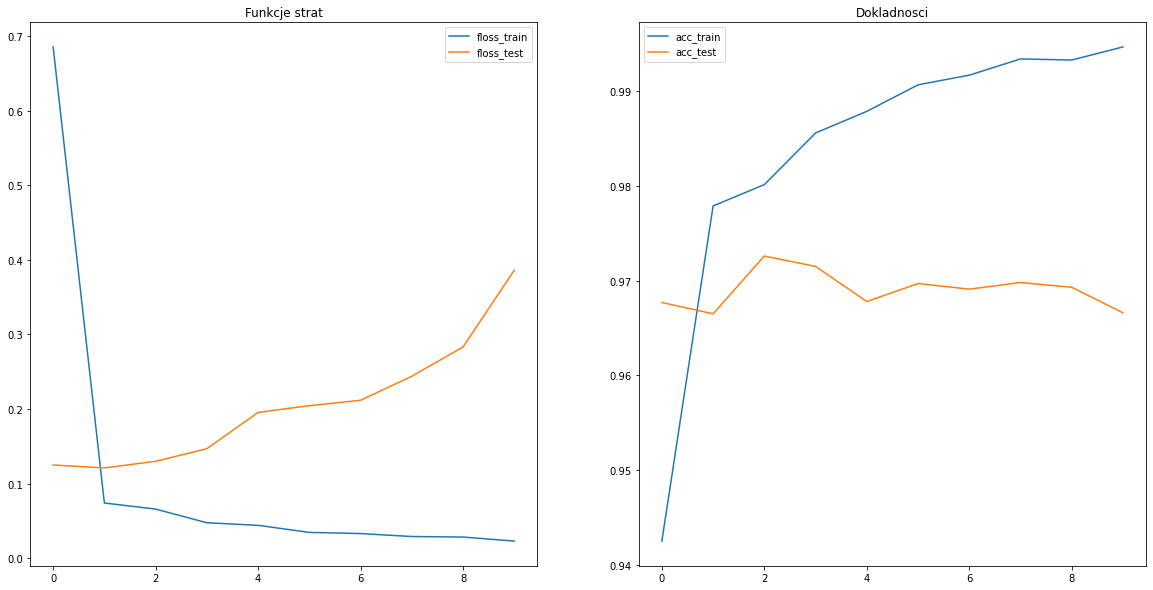

In [31]:
rysuj_wykresy(history)

In [32]:
 # zad 8_1

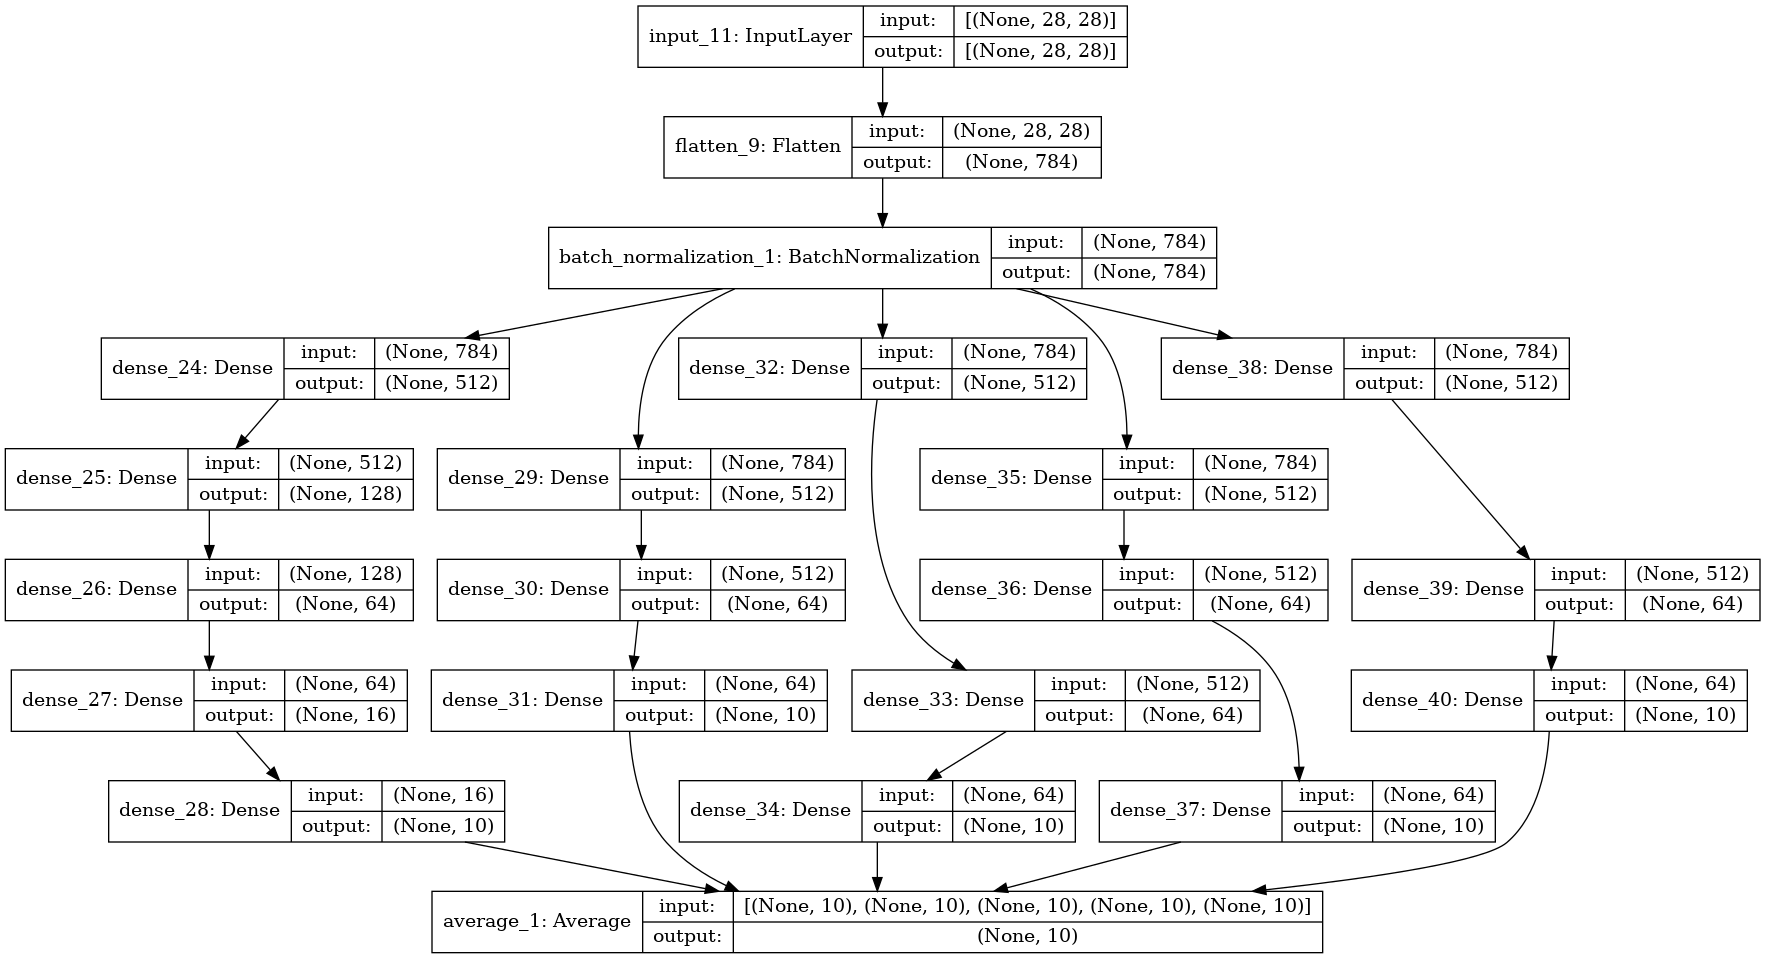

In [34]:
from keras.layers import Conv2D, MaxPooling2D, Reshape, BatchNormalization, Average
from keras.layers import concatenate
def add_module(input_tensor):
  act_func = 'relu'
  paths = [
      [Dense(512, activation = act_func),
       Dense(128, activation = act_func),
       Dense(64, activation = act_func),
       Dense(16, activation = act_func),
       Dense(10, activation = act_func)
       ],
       [
           Dense(512, activation = act_func),
          Dense(64, activation = act_func),
          Dense(10, activation = act_func),
       ],
       [
           Dense(512, activation = act_func),
            Dense(64, activation = act_func),
            Dense(10, activation = act_func)
       ],
        [
           Dense(512, activation = act_func),
            Dense(64, activation = act_func),
            Dense(10, activation = act_func)
       ],
        [
           Dense(512, activation = act_func),
            Dense(64, activation = act_func),
            Dense(10, activation = act_func)
       ]
  ]
  for_concat = []
  for path in paths:
    output_tensor = input_tensor
    for layer in path:
      output_tensor = layer(output_tensor)
    for_concat.append(output_tensor)
  return for_concat

output_tensor = input_tensor = Input((28,28))
output_tensor = Flatten()(output_tensor)
output_tensor = BatchNormalization()(output_tensor)
output_tensor = add_module(output_tensor)
output_tensor = Average()(output_tensor)
ANN = Model(inputs = input_tensor,outputs = output_tensor)
ANN.compile(loss = 'categorical_crossentropy',metrics = 'accuracy', optimizer = 'adam')
from keras.utils.vis_utils import plot_model
plot_model(ANN, show_shapes=True)